### 1.2-3 What is the smallest value of n such that an algorithm whose running time is 100n<sup>2</sup> runs faster than an algorithm whose running time is 2<sup>n</sup>on the same machine?

In [15]:
import itertools as itr

running_time_1 = lambda x: (100 * x**2) / x
running_time_2 = lambda x: (2**x) / x
log = lambda n, rn1, rn2: print(f""" 
    For n of {n}: 
\t\t100*n^2 ran\t{rn1} instructions
\t\t2^n ran\t\t{rn2} instructions
""")
for i in itr.count(1):
    rn1 = running_time_1(i)
    rn2 = running_time_2(i)
    if rn1 < rn2:
        p_rn1 = running_time_1(i-1)
        p_rn2 = running_time_2(i-1)
        log(i-1, p_rn1, p_rn2)
        log(i, rn1, rn2)
        n_rn1 = running_time_1(i+1)
        n_rn2 = running_time_2(i+1)
        log(i+1, n_rn1, n_rn2)
        break

 
    For n of 14: 
		100*n^2 ran	1400.0 instructions
		2^n ran		1170.2857142857142 instructions

 
    For n of 15: 
		100*n^2 ran	1500.0 instructions
		2^n ran		2184.5333333333333 instructions

 
    For n of 16: 
		100*n^2 ran	1600.0 instructions
		2^n ran		4096.0 instructions



### 1.1 For each function `f(n)` and time `t` in the following table, determine the largest
size `n` of a problem that can be solved in time `t`, assuming that the algorithm to
solve the problem takes `f(n)` microseconds.


times
  - second = 1000000 microseconds
  - minute = 60 seconds
  - hour = 60 minutes
  - day = 24 hours
  - month = 30 days
  - year = 365 days
  - century = 100 years

Complexities
  1. lg n
  2. <span style="white-space: nowrap; font-size:larger">&radic;<span style="text-decoration:overline;">&nbsp;n</span></span>
  3. n
  4. n lg n
  5. n<sup>2</sup>
  6. n<sup>3</sup>
  7. 2<sup>n</sup>
  8. n!


In [1]:
import math


second = 10**6
minute = 60* second
hour = 60 * minute
day = 24 * hour
month = 30 * day
year = 365 * day
century = 100 * year


In [171]:
import functools

lg_n = lambda t: f"2^{t:.3e}"
sqrt_n = lambda t: f"{t**2:.3e}"
n = lambda t: f"{t:.2e}"

def n_lg_n(t):
    lower = 0.0
    upper = 10e10
    while True:
        middle = (lower+upper)/2
        if lower == middle or middle == upper:
            return f"{middle:.2e}"
        if middle*math.log(middle, 2) > t:
            upper = middle
        else:
            lower = middle
            
n_sqrt = lambda t: f"{round(math.pow(t, 1/2))}"
n_cube = lambda t: f"{round(math.pow(t, 1/3))}"
two_n = lambda t: f"{math.floor(math.log(t, 2) / math.log(2, 2))}"


def n_factorial(t):
    i, f = 0, 1
    while f < t:
        i += 1
        f = math.factorial(i)
    return i - 1

In [181]:
from collections import defaultdict
import pandas as pd

complexity_functions = [lg_n, sqrt_n, n, n_lg_n, n_sqrt, n_cube, two_n, n_factorial]  
times = defaultdict(list)

for label, t in zip(['second', 'minute', 'hour', 'day', 'month', 'year', 'century'], [second, minute, hour, day, month, year, century]):
    times[label] = [fn(t) for fn in complexity_functions]
    

In [182]:
df = pd.DataFrame(times, index=['lg_n', 'sqrt(n)', 'n', 'n·lg_n', 'n^2', 'n^3', '2^n', 'n!']) 

display(df)

,second,minute,hour,day,month,year,century
lg_n,2^1.000e+06,2^6.000e+07,2^3.600e+09,2^8.640e+10,2^2.592e+12,2^3.154e+13,2^3.154e+15
sqrt(n),1.000e+12,3.600e+15,1.296e+19,7.465e+21,6.718e+24,9.945e+26,9.945e+30
n,1.00e+06,6.00e+07,3.60e+09,8.64e+10,2.59e+12,3.15e+13,3.15e+15
n·lg_n,6.27e+04,2.80e+06,1.33e+08,2.76e+09,7.19e+10,1.00e+11,1.00e+11
n^2,1000,7746,60000,293939,1609969,5615692,56156923
n^3,100,391,1533,4421,13737,31594,146646
2^n,19,25,31,36,41,44,51
n!,9,11,12,13,15,16,17


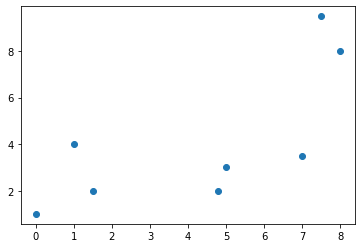

[(1.019803902718557, (4.8, 2.0), (5.0, 3.0)), (1.5811388300841898, (8.0, 8.0), (7.5, 9.5)), (1.8027756377319946, (0.0, 1.0), (1.5, 2.0)), (2.0615528128088303, (1.5, 2.0), (1.0, 4.0)), (2.0615528128088303, (5.0, 3.0), (7.0, 3.5)), (2.6627053911388696, (4.8, 2.0), (7.0, 3.5)), (3.1622776601683795, (0.0, 1.0), (1.0, 4.0)), (3.3, (1.5, 2.0), (4.8, 2.0)), (3.640054944640259, (1.5, 2.0), (5.0, 3.0)), (4.123105625617661, (1.0, 4.0), (5.0, 3.0)), (4.294182110716777, (1.0, 4.0), (4.8, 2.0)), (4.6097722286464435, (7.0, 3.5), (8.0, 8.0)), (4.903060268852505, (0.0, 1.0), (4.8, 2.0)), (5.385164807134504, (0.0, 1.0), (5.0, 3.0)), (5.70087712549569, (1.5, 2.0), (7.0, 3.5)), (5.830951894845301, (5.0, 3.0), (8.0, 8.0)), (6.020797289396148, (1.0, 4.0), (7.0, 3.5)), (6.020797289396148, (7.0, 3.5), (7.5, 9.5)), (6.8, (4.8, 2.0), (8.0, 8.0)), (6.96419413859206, (5.0, 3.0), (7.5, 9.5)), (7.433034373659253, (0.0, 1.0), (7.0, 3.5)), (7.971198153351853, (4.8, 2.0), (7.5, 9.5)), (8.06225774829855, (1.0, 4.0), (

In [18]:
import numpy as np
from matplotlib import pyplot as plt
import math
import itertools

datapoints = (0,1),(1.5,2),(1,4),(4.8,2),(5,3),(7,3.5),(8,8),(7.5,9.5)

data = np.array([
     datapoints
])
x, y = data.T
plt.scatter(x,y)
plt.show()

def get_distances(data):
    distances = []
    for ((x1, y1), (x2, y2)) in itertools.combinations(data, 2):
        x1, y1 = float(x1), float(y1)
        x2, y2 = float(x2), float(y2)
        d = math.sqrt((x2-x1)**2 + (y2-y1)**2)
        distances.append((d, (x1, y1), (x2, y2)))
    return sorted(distances, key=lambda x: x[0])    

print(get_distances(datapoints))

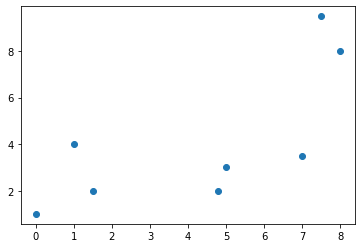

[(1.019803902718557, (5.0, 3.3), (6.0, 3.5)), (1.25, (1.5, 1.0), (2.75, 1.0)), (1.2806248474865698, (7.5, 2.0), (8.5, 1.2)), (2.1213203435596424, (6.0, 3.5), (7.5, 2.0)), (2.5, (6.0, 3.5), (8.0, 5.0)), (2.817800560721074, (5.0, 3.3), (7.5, 2.0)), (2.8442925306655784, (1.5, 1.0), (2.0, 3.8)), (2.898706608127149, (2.0, 3.8), (2.75, 1.0)), (3.0413812651491097, (2.0, 3.8), (5.0, 3.3)), (3.0413812651491097, (7.5, 2.0), (8.0, 5.0)), (3.2175301086392336, (2.75, 1.0), (5.0, 3.3)), (3.3970575502926055, (6.0, 3.5), (8.5, 1.2)), (3.448187929913334, (5.0, 3.3), (8.0, 5.0)), (3.83275357934736, (8.5, 1.2), (8.0, 5.0)), (4.011234224026316, (2.0, 3.8), (6.0, 3.5)), (4.08166632639171, (5.0, 3.3), (8.5, 1.2)), (4.100304866714182, (2.75, 1.0), (6.0, 3.5)), (4.188078318274385, (1.5, 1.0), (5.0, 3.3)), (4.8541219597369, (2.75, 1.0), (7.5, 2.0)), (5.1478150704935, (1.5, 1.0), (6.0, 3.5)), (5.753477209479499, (2.75, 1.0), (8.5, 1.2)), (5.7870545184921145, (2.0, 3.8), (7.5, 2.0)), (6.082762530298219, (1.5, 1.

In [20]:
datapoints = (1.5,1),(2,3.8),(2.75,1),(5,3.3),(6,3.5),(7.5,2),(8.5,1.2),(8,5)
data = np.array([
     data
])
x, y = data.T
plt.scatter(x,y)
plt.show()

print(get_distances(datapoints))

In [23]:
# A divide and conquer program in Python3  
# to find the smallest distance from a  
# given set of points. 
import math 
  
# A class to represent a Point in 2D plane  
class Point(): 
    def __init__(self, x, y): 
        self.x = x 
        self.y = y 
  
# A utility function to find the  
# distance between two points  
def dist(p1, p2): 
    return math.sqrt((p1.x - p2.x) * 
                     (p1.x - p2.x) +
                     (p1.y - p2.y) * 
                     (p1.y - p2.y))  
  
# A Brute Force method to return the  
# smallest distance between two points  
# in P[] of size n 
def bruteForce(P, n): 
    min_val = float('inf')  
    for i in range(n): 
        for j in range(i + 1, n): 
            if dist(P[i], P[j]) < min_val: 
                min_val = dist(P[i], P[j]) 
  
    return min_val 
  
# A utility function to find the  
# distance beween the closest points of  
# strip of given size. All points in  
# strip[] are sorted accordint to  
# y coordinate. They all have an upper  
# bound on minimum distance as d.  
# Note that this method seems to be  
# a O(n^2) method, but it's a O(n)  
# method as the inner loop runs at most 6 times 
def stripClosest(strip, size, d): 
      
    # Initialize the minimum distance as d  
    min_val = d  
  
    strip.sort(key = lambda point: point.y)  
  
    # Pick all points one by one and  
    # try the next points till the difference  
    # between y coordinates is smaller than d.  
    # This is a proven fact that this loop 
    # runs at most 6 times  
    for i in range(size): 
        j = i + 1
        while j < size and (strip[j].y - 
                            strip[i].y) < min_val: 
            min_val = dist(strip[i], strip[j]) 
            j += 1
  
    return min_val  
  
# A recursive function to find the  
# smallest distance. The array P contains  
# all points sorted according to x coordinate 
def closestUtil(P, n): 
      
    # If there are 2 or 3 points,  
    # then use brute force  
    if n <= 3:  
        return bruteForce(P, n)  
  
    # Find the middle point  
    mid = n // 2
    midPoint = P[mid] 
  
    # Consider the vertical line passing  
    # through the middle point calculate  
    # the smallest distance dl on left  
    # of middle point and dr on right side  
    dl = closestUtil(P[:mid], mid) 
    dr = closestUtil(P[mid:], n - mid)  
  
    # Find the smaller of two distances  
    d = min(dl, dr) 
    print(d)
  
    # Build an array strip[] that contains  
    # points close (closer than d)  
    # to the line passing through the middle point  
    strip = []  
    for i in range(n):  
        if abs(P[i].x - midPoint.x) < d:  
            strip.append(P[i]) 
  
    # Find the closest points in strip.  
    # Return the minimum of d and closest  
    # distance is strip[]  
    return min(d, stripClosest(strip, len(strip), d)) 
  
# The main function that finds 
# the smallest distance.  
# This method mainly uses closestUtil() 
def closest(P, n): 
    P.sort(key = lambda point: point.x) 
  
    # Use recursive function closestUtil()  
    # to find the smallest distance  
    return closestUtil(P, n) 
  
# Driver code 
P = [Point(x, y) for x, y in [(0,1),(1.5,2),(1,4),(4.8,2),(5,3),(7,3.5),(8,8),(7.5,9.5)]]
n = len(P)  
print("The smallest distance is",  
                   closest(P, n)) 
  
# This code is contributed  
# by Prateek Gupta (@prateekgupta10) 

3.1622776601683795
1.5811388300841898
1.5811388300841898
The smallest distance is 1.019803902718557
